In [12]:
# Load Packages
import numpy as np
import pandas as pd 
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, f1_score
from sklearn.linear_model import LogisticRegression

from imblearn.metrics import classification_report_imbalanced
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import ClusterCentroids

In [13]:
cc_df=pd.read_csv("creditcard.csv")
print(cc_df)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.01830

In [14]:
# Split into Train / Test Sets
x=cc_df.drop(columns='Class',axis=1)
print(x)

y=cc_df[['Class']].copy()
print(y)

xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=1)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V20       V21  \
0       0.462388  0.239599  0.098698  0.363787  ...  0.25141

In [15]:
# Oversampling (Smote) + Isolation Forest
xsmote,ysmote=SMOTE(random_state=1,sampling_strategy=1.0).fit_resample(xtrain,ytrain)

print(xsmote)
print(ysmote)

                 Time         V1        V2         V3        V4        V5  \
0       159708.000000  -0.459482  1.198230   2.315423  4.274698  0.603004   
1       129139.000000   1.878563  0.020785  -1.621113  2.908813  2.507847   
2         4263.000000  -1.467414  1.210542   1.891733 -0.282189 -0.214526   
3       113041.000000   2.073474 -0.147624  -1.495803  0.184499  0.107505   
4        77352.000000   1.097497  0.357207   1.051187  2.631217 -0.464023   
...               ...        ...       ...        ...       ...       ...   
426443   41233.586829 -10.355998  6.092424 -13.081348  7.333507 -9.550066   
426444   35886.873089  -2.813944  3.771450  -3.775914  5.561832 -3.589699   
426445  143237.936649  -1.408302  2.508873  -2.686728  4.111950  0.516272   
426446  129738.321857  -1.581447  2.974258  -6.213306  3.656808 -0.810412   
426447  150719.013410  -0.261952  1.361121  -2.416682  3.613812  0.951105   

              V6         V7        V8        V9  ...       V20       V21  \

In [16]:
model = LogisticRegression(solver='lbfgs', random_state=1, max_iter=1000)

In [17]:
model.fit(xsmote,ysmote.values.ravel())

LogisticRegression(max_iter=1000, random_state=1)

In [18]:
lr_pred = model.predict(xtest)
print(classification_report_imbalanced(ytest,lr_pred))
print("ACCURACY: "+str(accuracy_score(ytest,lr_pred)))
print("AREA UNDER CURVE: "+str(roc_auc_score(ytest,lr_pred)))
print("F1-SCORE: "+str(f1_score(ytest,lr_pred)))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.99      0.85      0.99      0.92      0.85     71091
          1       0.12      0.85      0.99      0.20      0.92      0.83       111

avg / total       1.00      0.99      0.85      0.99      0.92      0.85     71202

ACCURACY: 0.9896351226089155
AREA UNDER CURVE: 0.9183524580410262
F1-SCORE: 0.20302375809935205


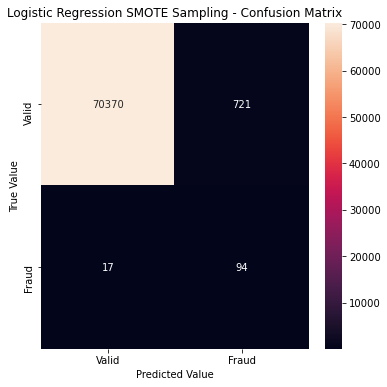

In [20]:
labels= ['Valid', 'Fraud'] 
conf_matrix=confusion_matrix(ytest,lr_pred) 
plt.figure(figsize=(6, 6)) 
sns.heatmap(conf_matrix, xticklabels= labels, yticklabels= labels, annot=True, fmt="d")
plt.title("Logistic Regression SMOTE Sampling - Confusion Matrix") 
plt.ylabel('True Value') 
plt.xlabel('Predicted Value') 
plt.show()

In [21]:
# SMOTEENN
smote_enn = SMOTEENN(random_state=0)
xsmtn,ysmtn=smote_enn.fit_resample(xtrain,ytrain)

In [22]:
model.fit(xsmtn,ysmtn.values.ravel())

LogisticRegression(max_iter=1000, random_state=1)

In [24]:
lr_pred = model.predict(xtest)
print(classification_report_imbalanced(ytest,lr_pred))
print("ACCURACY: "+str(accuracy_score(ytest,lr_pred)))
print("AREA UNDER CURVE: "+str(roc_auc_score(ytest,lr_pred)))
print("F1-SCORE: "+str(f1_score(ytest,lr_pred)))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.98      0.84      0.99      0.91      0.84     71091
          1       0.07      0.84      0.98      0.14      0.91      0.81       111

avg / total       1.00      0.98      0.84      0.99      0.91      0.84     71202

ACCURACY: 0.9835538327575069
AREA UNDER CURVE: 0.9108095942505361
F1-SCORE: 0.13706705969049374


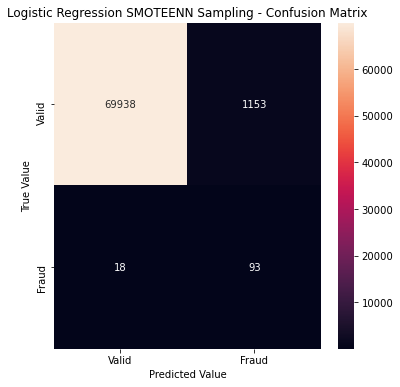

In [25]:
labels= ['Valid', 'Fraud'] 
conf_matrix=confusion_matrix(ytest,lr_pred) 
plt.figure(figsize=(6, 6)) 
sns.heatmap(conf_matrix, xticklabels= labels, yticklabels= labels, annot=True, fmt="d")
plt.title("Logistic Regression SMOTEENN Sampling - Confusion Matrix") 
plt.ylabel('True Value') 
plt.xlabel('Predicted Value') 
plt.show()

In [26]:
# Cluster Centroids
cc=ClusterCentroids(random_state=1)
xcc,ycc=cc.fit_resample(xtrain,ytrain)

In [28]:
model.fit(xcc,ycc.values.ravel())

LogisticRegression(max_iter=1000, random_state=1)

In [29]:
lr_pred = model.predict(xtest)
print(classification_report_imbalanced(ytest,lr_pred))
print("ACCURACY: "+str(accuracy_score(ytest,lr_pred)))
print("AREA UNDER CURVE: "+str(roc_auc_score(ytest,lr_pred)))
print("F1-SCORE: "+str(f1_score(ytest,lr_pred)))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.91      0.86      0.95      0.88      0.79     71091
          1       0.01      0.86      0.91      0.03      0.88      0.78       111

avg / total       1.00      0.91      0.86      0.95      0.88      0.79     71202

ACCURACY: 0.9054942276902335
AREA UNDER CURVE: 0.8852112651960734
F1-SCORE: 0.02774165583008236


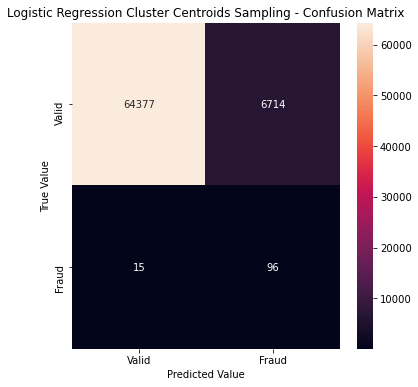

In [30]:
labels= ['Valid', 'Fraud'] 
conf_matrix=confusion_matrix(ytest,lr_pred) 
plt.figure(figsize=(6, 6)) 
sns.heatmap(conf_matrix, xticklabels= labels, yticklabels= labels, annot=True, fmt="d")
plt.title("Logistic Regression Cluster Centroids Sampling - Confusion Matrix") 
plt.ylabel('True Value') 
plt.xlabel('Predicted Value') 
plt.show()

In [31]:
# No Sampling
model.fit(xtrain,ytrain.values.ravel())
lr_pred = model.predict(xtest)
print(classification_report_imbalanced(ytest,lr_pred))
print("ACCURACY: "+str(accuracy_score(ytest,lr_pred)))
print("AREA UNDER CURVE: "+str(roc_auc_score(ytest,lr_pred)))
print("F1-SCORE: "+str(f1_score(ytest,lr_pred)))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      0.59      1.00      0.77      0.61     71091
          1       0.81      0.59      1.00      0.68      0.77      0.56       111

avg / total       1.00      1.00      0.59      1.00      0.77      0.61     71202

ACCURACY: 0.9991432824920649
AREA UNDER CURVE: 0.7926872942064739
F1-SCORE: 0.6806282722513088


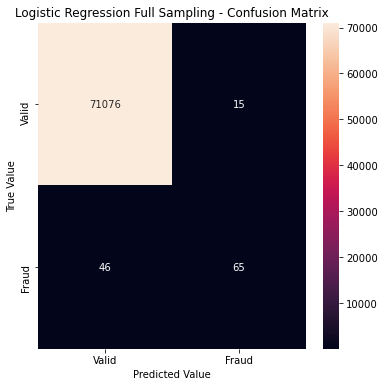

In [32]:
labels= ['Valid', 'Fraud'] 
conf_matrix=confusion_matrix(ytest,lr_pred) 
plt.figure(figsize=(6, 6)) 
sns.heatmap(conf_matrix, xticklabels= labels, yticklabels= labels, annot=True, fmt="d")
plt.title("Logistic Regression Full Sampling - Confusion Matrix") 
plt.ylabel('True Value') 
plt.xlabel('Predicted Value') 
plt.show()